In [566]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [568]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [570]:
# Read the data from csv file

df = pd.read_csv('day.csv')

In [572]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [574]:
df.shape

(730, 16)

In [576]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [578]:
#by looking at info it is observed that there are no null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [580]:
# there are no duplicated values 
df.duplicated().any()

False

In [582]:
df.rename(columns={'yr': 'year', 'mnth': 'month', 'hum': 'humidity'}, inplace=True)

In [584]:
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [586]:
# dropping unnecessary coloumns
df_wrk=df
# dropping the instance as it index, casual and registerd is targeted variable split into different colomn. 
#dteday coloumn we are interested in year and month which are already available so dropping them. 
# casual and registered are basically split of targeted variable split up so we can drop it for model building
df_wrk.drop(['instant','casual','registered','dteday'],axis=1,inplace=True)

In [588]:
df_wrk.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [590]:
# Encoding/mapping the season column

df_wrk.season = df_wrk.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [592]:
# Encoding/mapping the month column

df_wrk.month = df_wrk.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [594]:
# Encoding/mapping the weekday column

df_wrk.weekday = df_wrk.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [596]:
# Encoding/mapping the weathersit column

df_wrk.weathersit = df_wrk.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [598]:
df_wrk.workingday.value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

# Data visualization

In [601]:
df_wrk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## categorical variables 

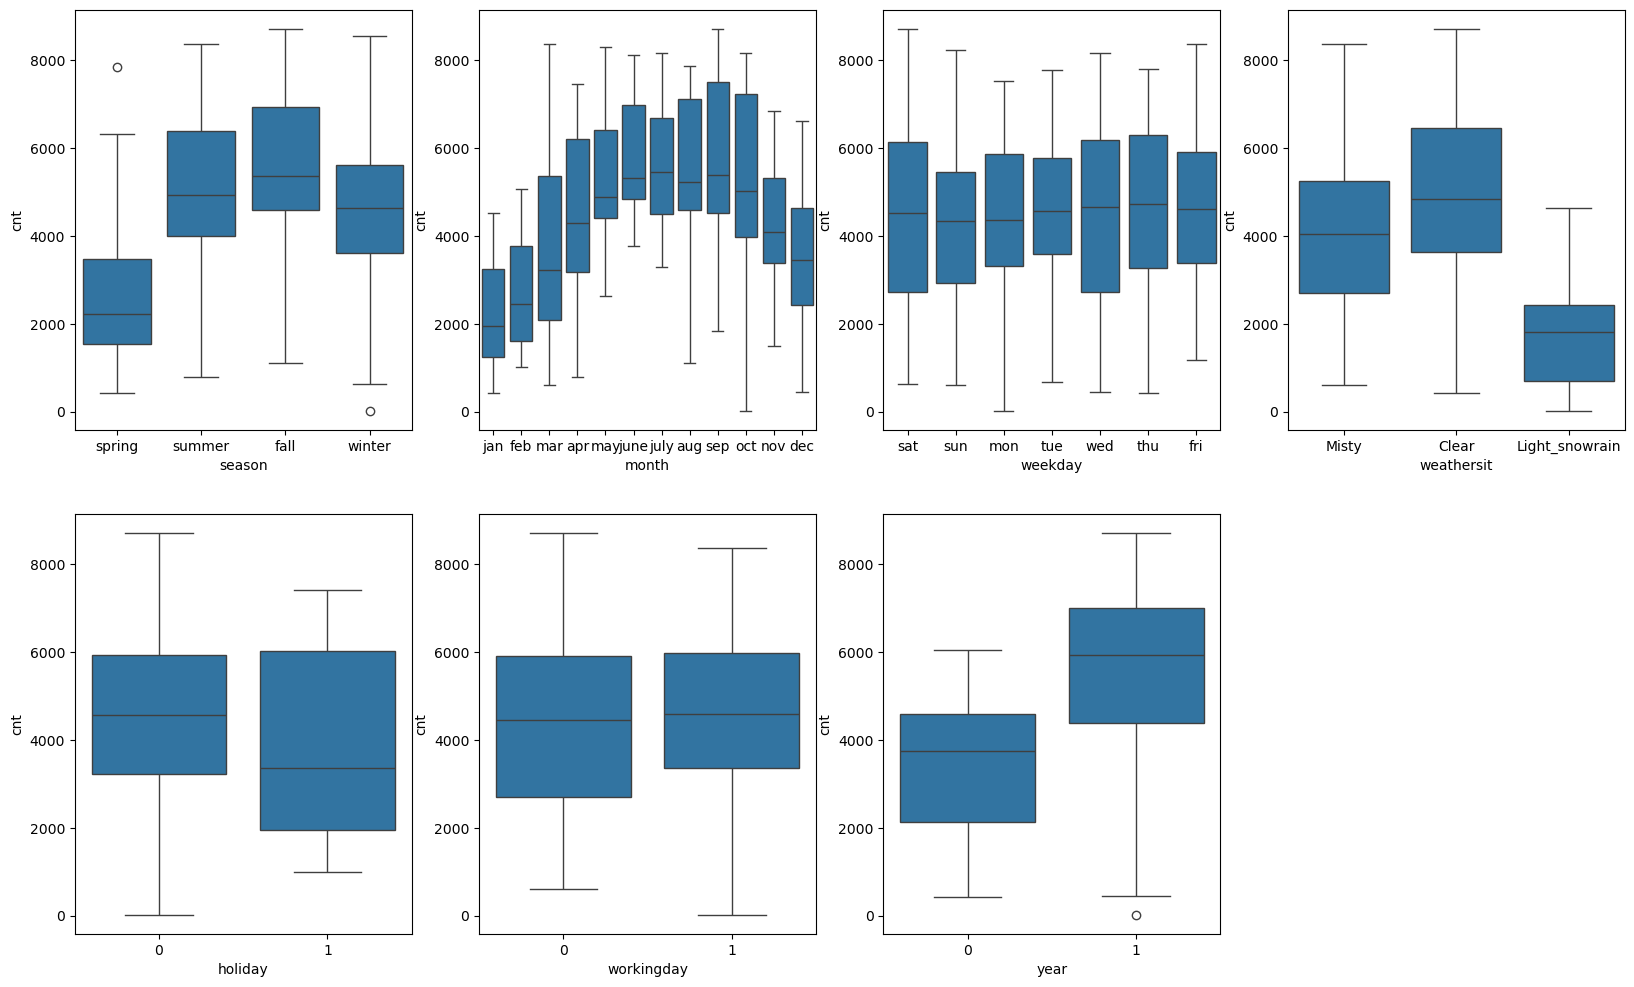

In [604]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_wrk)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = df_wrk)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_wrk)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_wrk)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_wrk)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_wrk)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = df_wrk)
plt.show()

# observation
# 1. bookings are hign in fall season followed by summer season
# 2. bookings are normally hign in months between [apr-nov], compared to average booking
# 3. booking are high when weather is clear
# 4. When day is holiday there is consistency of bookings. means bookings are usually high and spread around mean of bookings at higher side.
# 5. 2019 has more booking than 2018

In [606]:
# function to create barplot related to categorical columns, split between 2018 and 2019

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt',data=df_wrk)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt',data=df_wrk, hue='year',palette='Set2')
    plt.legend(labels=['2018', '2019'])
    plt.show()

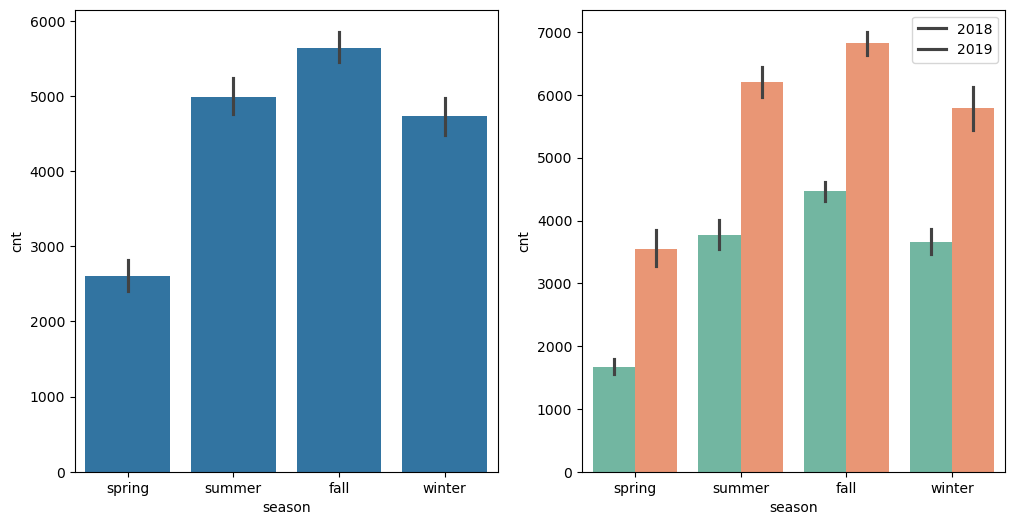

In [608]:
# plotting visualization for season column

plot_cat_columns('season')
#as discussed in fall has more bookings and it is increased in next year

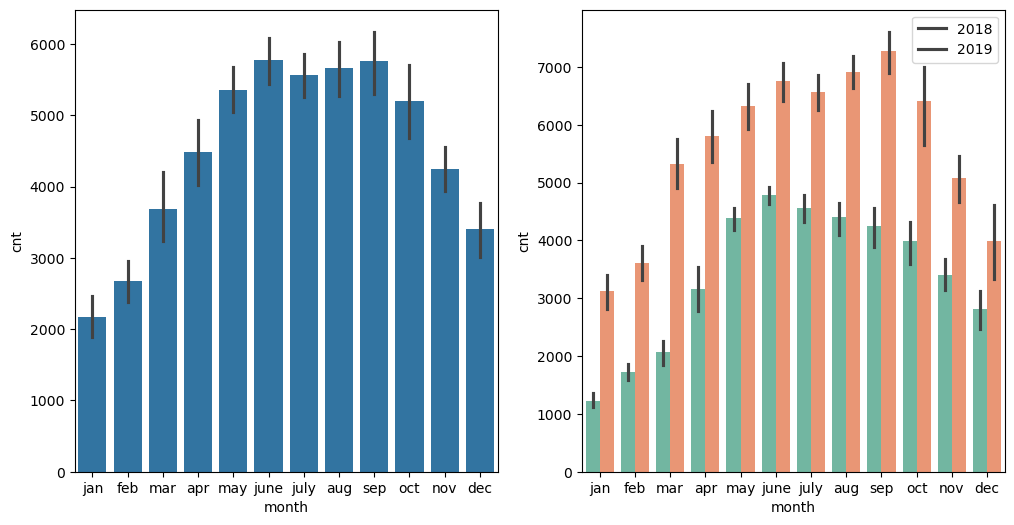

In [610]:
# plotting visualization for month column

plot_cat_columns('month')
#compared to 2018 in 2019 in all months bookings increased a lot. but demand seems to be high in may, jun, july in 2018 and 
# june to september in 2019

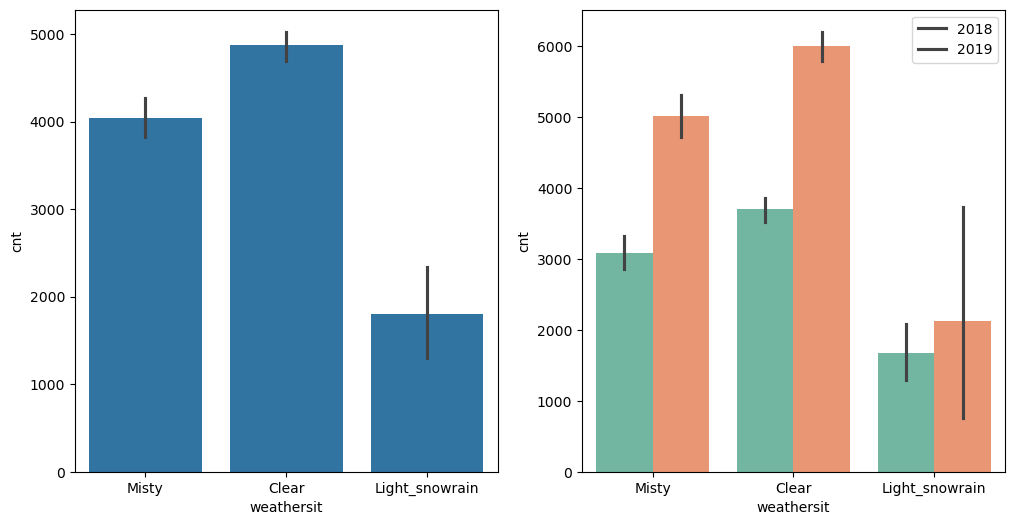

In [611]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

# bookings are high in clear weather. same followed from 2018 to 2019 but increase in bookings a lot.

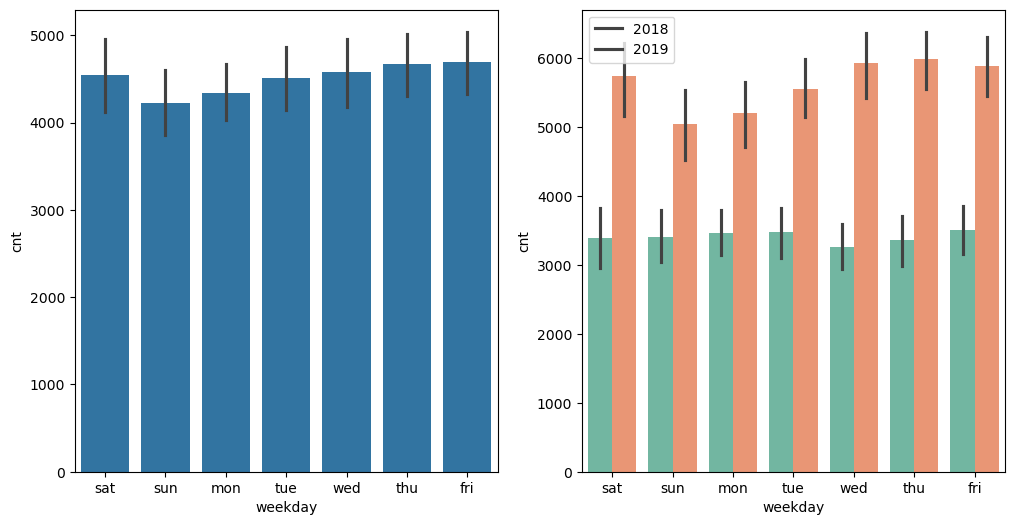

In [614]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

# bookings are increasing as we are reaching weekend and through the weekend and peeking at saturday.

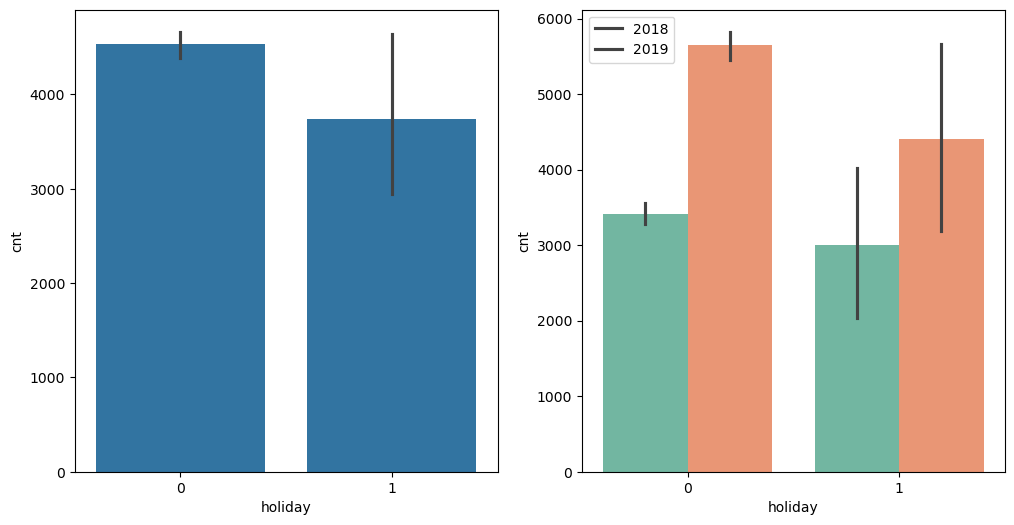

In [616]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

#When its not holiday, booking seems to be less in number which seems reasonable as on holidays,
#people may want to spend time at home and enjoy with family.

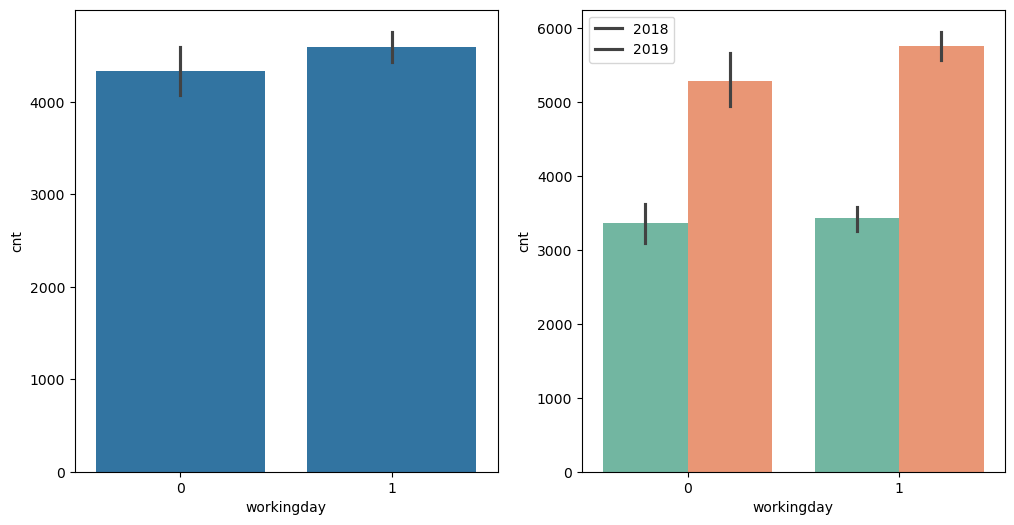

In [618]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

#dont see much difference with workingday, but bookings increased in 2019 compared to 2018.

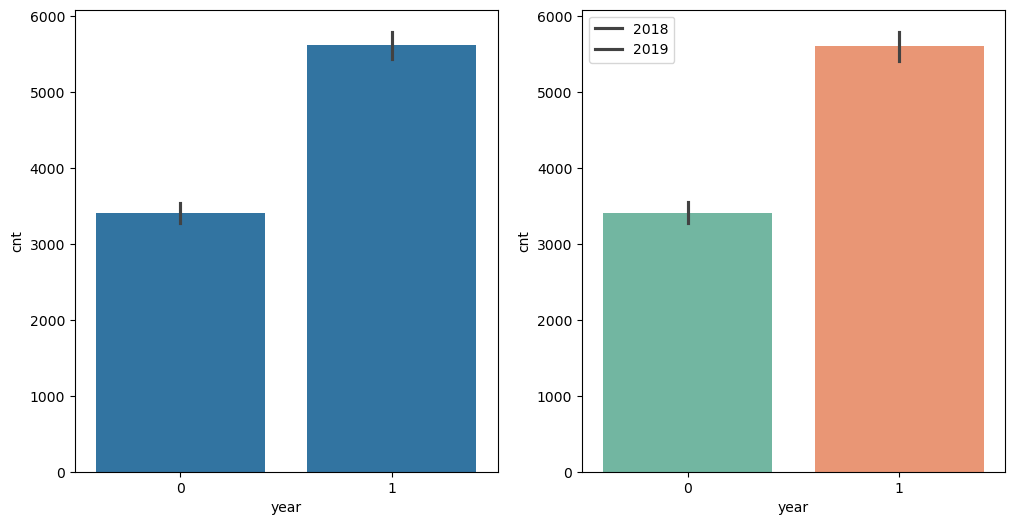

In [620]:
# plotting visualization for year column

plot_cat_columns('year')

#obviously bookings increased from 2018 to 2019. this may suggest the penetration of market by company in 2019.

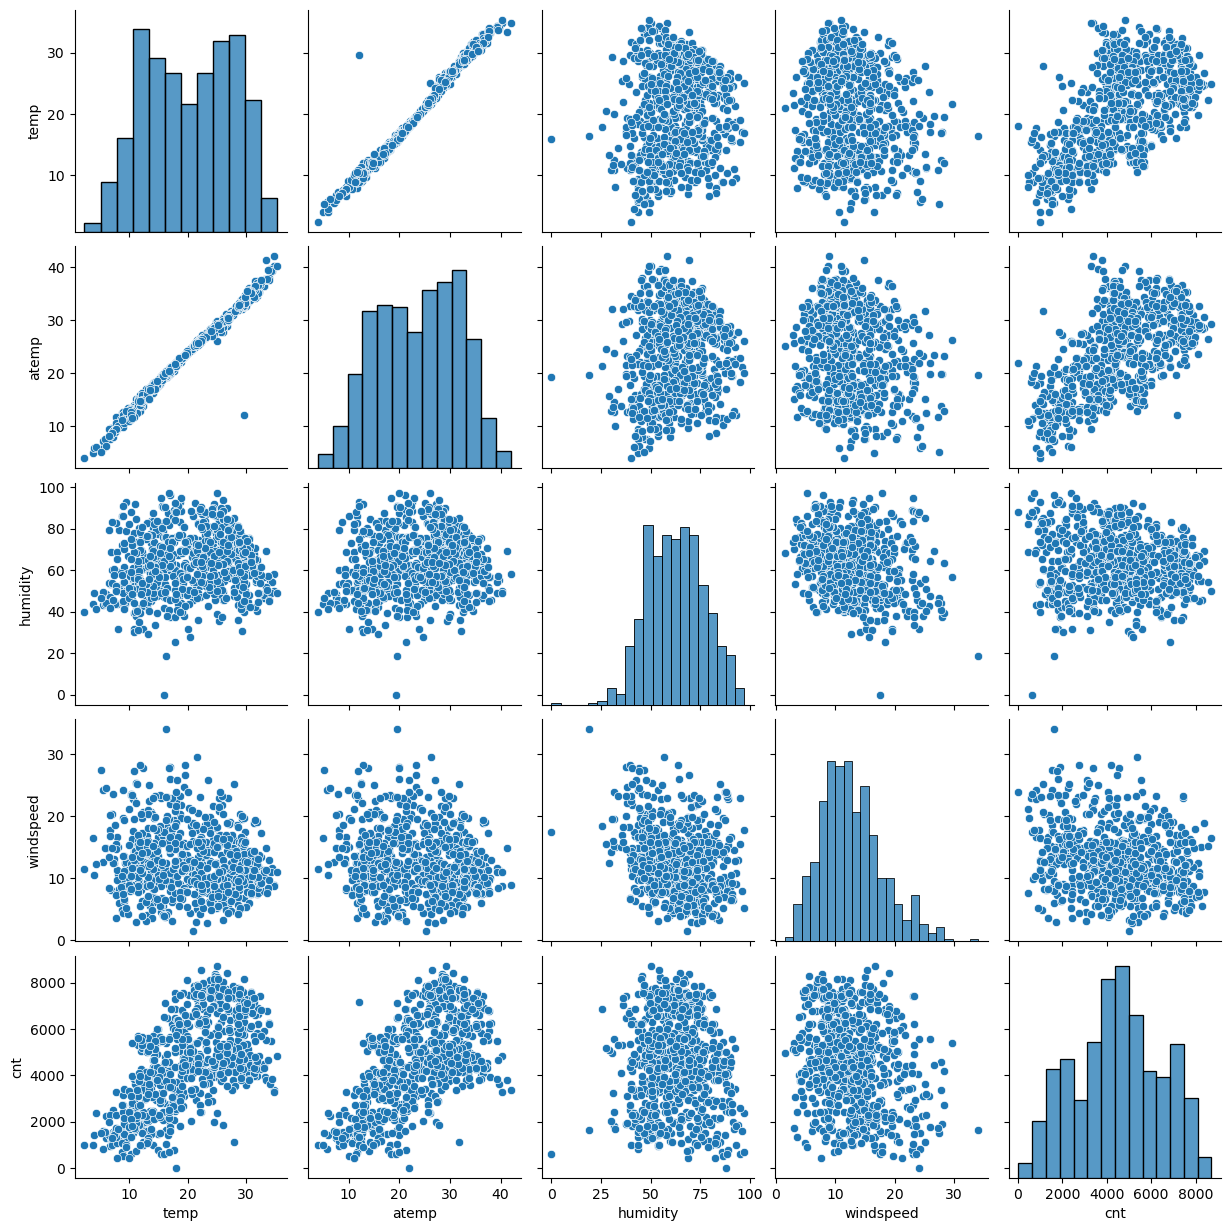

In [622]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=df_wrk,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

# there is strong correality between temp and atemp. this means temperature is dependent on atemp. 
# we can drop any one of the variable when creating the model.
# there is some increase in bookings with increase in temperature

## Numerical variables 

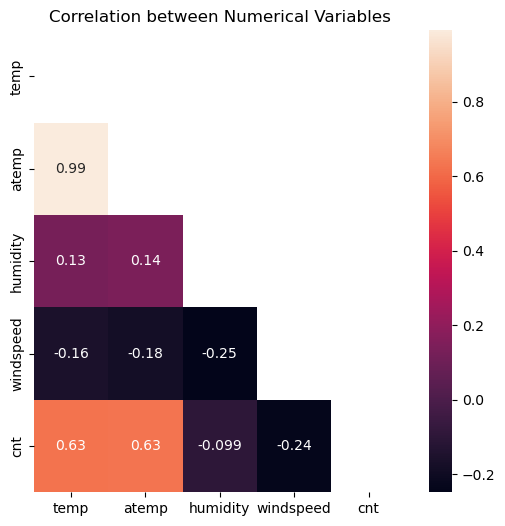

In [624]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(df_wrk[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(df_wrk[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

#as suggested there is correlation between atemp and temp. we can drop any one of them based on VIF and p-value. 
#there is positive correlation of booking with temp and atemp, negetive correlation with humidy and windspread

# Data preprocess for model building 

In [628]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df_wrk.month,drop_first=True,dtype=int)
weekdays_df=pd.get_dummies(df_wrk.weekday,drop_first=True,dtype=int)
weathersit_df=pd.get_dummies(df_wrk.weathersit,drop_first=True,dtype=int)
seasons_df=pd.get_dummies(df_wrk.season,drop_first=True,dtype=int)

In [630]:
# Merging  the dataframe, with the dummy variable dataset. 

df_md = pd.concat([df_wrk,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [632]:
df_md.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [634]:
df_md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    int64  
 13  dec             730 non-null    int64  
 14  feb             730 non-null    int64  
 15  jan             730 non-null    int64  
 16  july            730 non-null    int64  
 17  june            730 non-null    int

In [636]:
# drop converted columns
df_md.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [638]:
df_md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    int64  
 9   dec             730 non-null    int64  
 10  feb             730 non-null    int64  
 11  jan             730 non-null    int64  
 12  july            730 non-null    int64  
 13  june            730 non-null    int64  
 14  mar             730 non-null    int64  
 15  may             730 non-null    int64  
 16  nov             730 non-null    int64  
 17  oct             730 non-null    int

In [640]:
df_md.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.084932,0.084932,...,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.336986,0.246575,0.252055,0.243836
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.278971,0.278971,...,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.473004,0.431313,0.434490,0.429689
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Seperating the training and test set

In [643]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(df_md, train_size = 0.7, random_state = 100)

In [645]:
# check the shape of training datatset

df_train.shape

(510, 30)

In [647]:
# standaridizing the data for other variables as most of the variables have ranges between 0 and 1 using minmax method
scaler = MinMaxScaler()

#apply scalar to the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [649]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [651]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


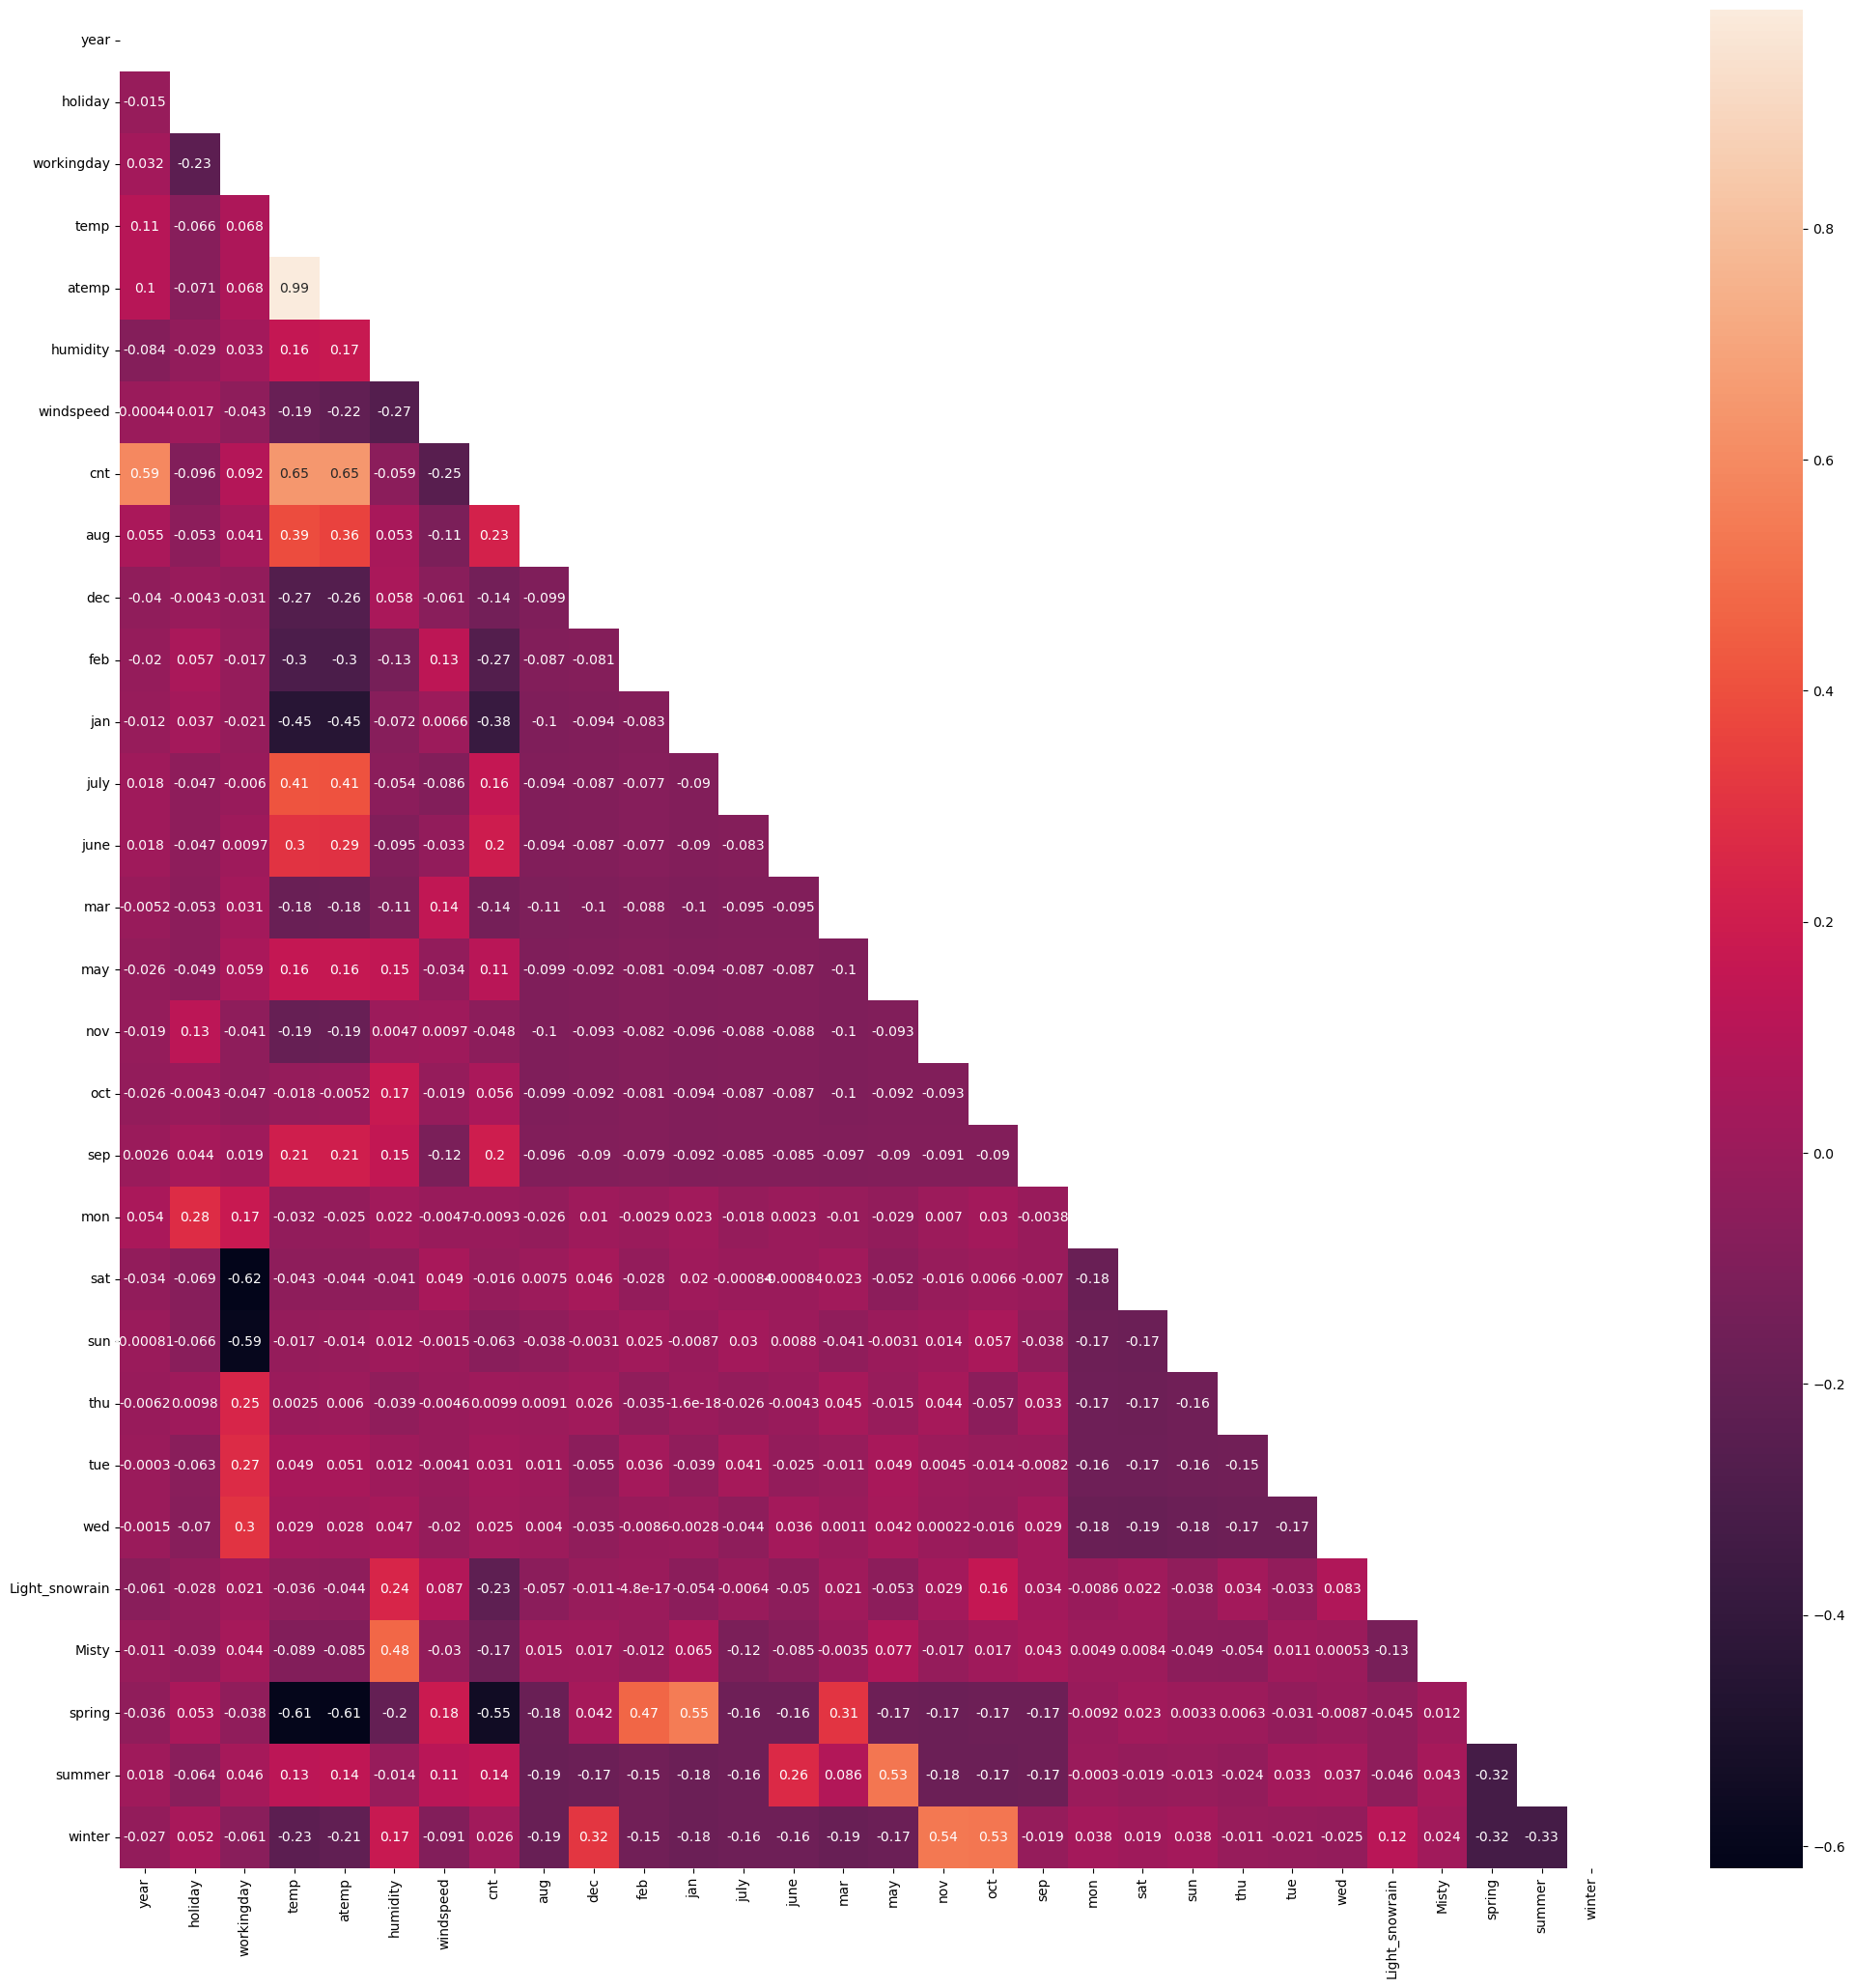

In [653]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, mask=matrix)
plt.show()

#cnt hase correlation with temp, year, there is some correleianity within multiple variabels example: 
# Misty and humidity, july and temp, temp and atemp, spring and [feb , jan] , summer and [may,winter] and nov,oct --> all are positive correlation
# spring and temp, spring and cnt , workingdate and [sat, sund], jan and cnt all have negetive correlation
# this may suggest some variables has influecne on other variables meaning not all variables are independent. so we need to iteratively 
# check model fiiting with VIF and elemenate higher vif variables

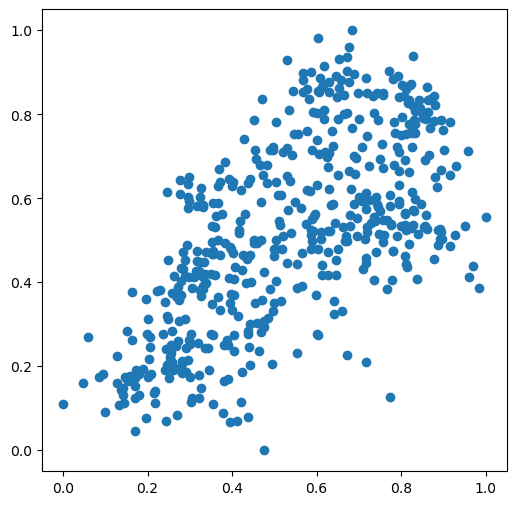

In [655]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### building model

In [658]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [660]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [662]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', True, 1),
 ('dec', False, 3),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', False, 6),
 ('june', False, 15),
 ('mar', False, 7),
 ('may', False, 5),
 ('nov', False, 4),
 ('oct', False, 10),
 ('sep', True, 1),
 ('mon', False, 14),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 12),
 ('tue', False, 9),
 ('wed', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', False, 13),
 ('summer', True, 1),
 ('winter', True, 1)]

In [664]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'aug',
       'jan', 'sep', 'sat', 'sun', 'Light_snowrain', 'Misty', 'summer',
       'winter'],
      dtype='object')


In [666]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'dec', 'feb', 'july', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed', 'spring'],
      dtype='object')

In [668]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [670]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [672]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,34.00
9,sat,8.38
10,sun,8.20
1,holiday,2.24
3,temp,1.94
4,humidity,1.88
14,winter,1.58
12,Misty,1.56
7,jan,1.55
13,summer,1.48


In [676]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          1.01e-191
Time:                        12:27:02   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1727      0.023      7.

In [678]:
# holiday has higher p value so removing it
X_train_new = X_train_rfe.drop(['holiday'], axis = 1)


In [680]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          1.01e-191
Time:                        12:27:45   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1493      0.037      4.

In [682]:

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,humidity,27.03
1,workingday,16.02
2,temp,12.26
4,windspeed,4.35
8,sat,4.35
9,sun,4.25
11,Misty,2.22
0,year,2.07
13,winter,2.06
12,summer,1.97


In [684]:
# there are no variables with high p values 
# IVF for humidity is higher so dropping it
X_train_new_2 = X_train_new.drop(['humidity'], axis = 1)

In [686]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new_2)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.8
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          6.55e-189
Time:                        12:29:02   Log-Likelihood:                 508.90
No. Observations:                 510   AIC:                            -989.8
Df Residuals:                     496   BIC:                            -930.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0600      0.031      1.

In [688]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new_2)

,Features,VIF
1,workingday,10.87
2,temp,9.88
3,windspeed,4.35
7,sat,3.25
8,sun,3.04
0,year,2.06
11,summer,1.94
12,winter,1.80
4,aug,1.60
10,Misty,1.60


In [690]:
# there are no variables with high p values 
# IVF for workingday is higher so dropping it
X_train_new_3 = X_train_new_2.drop(['workingday'], axis = 1)

In [692]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new_3)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          8.65e-187
Time:                        12:30:54   Log-Likelihood:                 501.07
No. Observations:                 510   AIC:                            -976.1
Df Residuals:                     497   BIC:                            -921.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1558      0.020      7.

In [694]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new_3)

,Features,VIF
1,temp,5.17
2,windspeed,3.40
0,year,2.04
10,summer,1.89
3,aug,1.60
11,winter,1.56
9,Misty,1.54
5,sep,1.31
4,jan,1.23
6,sat,1.21


In [696]:
# sat has high p value
X_train_new_4 = X_train_new_3.drop(['sat'], axis = 1)

In [698]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new_4)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.1
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          1.27e-187
Time:                        12:33:25   Log-Likelihood:                 500.22
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     498   BIC:                            -925.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1584      0.020      8.

In [700]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new_4)

,Features,VIF
1,temp,5.13
2,windspeed,3.34
0,year,2.04
9,summer,1.89
3,aug,1.60
10,winter,1.55
8,Misty,1.54
5,sep,1.31
4,jan,1.22
6,sun,1.17


In [702]:
# there are no variables with high p values 
# IVF for temp is higher so dropping it
X_train_new_5 = X_train_new_4.drop(['temp'], axis = 1)

In [704]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new_5)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     117.4
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          3.25e-124
Time:                        12:41:06   Log-Likelihood:                 347.43
No. Observations:                 510   AIC:                            -672.9
Df Residuals:                     499   BIC:                            -626.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4602      0.017     27.

In [706]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new_5)

,Features,VIF
1,windspeed,2.63
0,year,1.84
8,summer,1.63
7,Misty,1.53
9,winter,1.48
3,jan,1.21
2,aug,1.19
5,sun,1.15
4,sep,1.11
6,Light_snowrain,1.08


1. it seems model has low p values and low IVF values
2. But R2 value is decreased significantly from previous model
3. between model 5 and model 6 only difference is since temp variable is not present. but dropping temp variable has 
effected the R_squerred a lot dropping from 0.836 to 0.702. so i will select the model 5 as the final model.

In [710]:
#final model
lr_5.params

const             0.158410
year              0.233729
temp              0.494675
windspeed        -0.159317
aug               0.050822
jan              -0.043931
sep               0.108077
sun              -0.045206
Light_snowrain   -0.283934
Misty            -0.080240
summer            0.094643
winter            0.125844
dtype: float64

## Residula Ananlysis

In [715]:
X_train_lm_5.head()

,const,year,temp,windspeed,aug,jan,sep,sun,Light_snowrain,Misty,summer,winter
576,1.0,1,0.815169,0.264686,0,0,0,0,0,0,0,0
426,1.0,1,0.442393,0.255342,0,0,0,0,0,1,0,0
728,1.0,1,0.245101,0.663106,0,0,0,1,0,0,0,0
482,1.0,1,0.395666,0.188475,0,0,0,0,0,1,1,0
111,1.0,0,0.345824,0.380981,0,0,0,0,0,1,1,0


In [717]:
y_train_pred = lr_5.predict(X_train_lm_5)

### normality of errors

Text(0.5, 0, 'Errors')

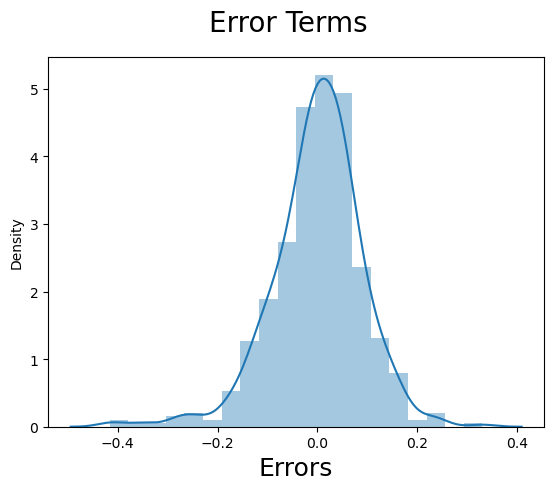

In [720]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

### Multi colliniearity

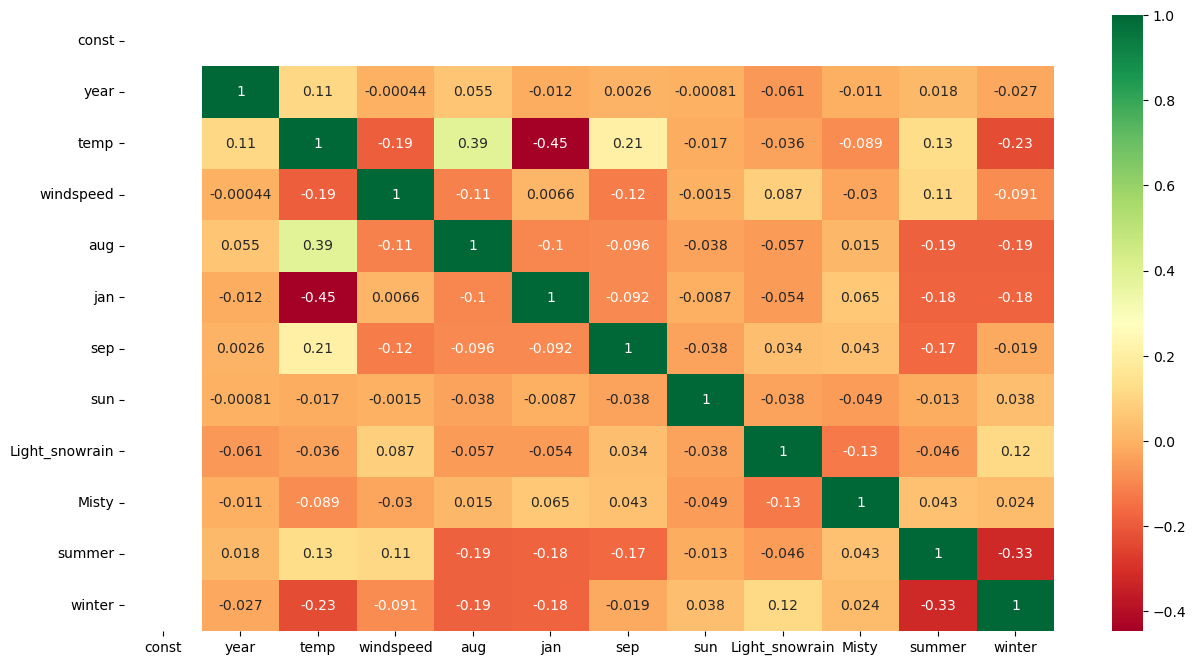

In [723]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_lm_5.corr(),annot = True, cmap="RdYlGn")
plt.show()

### Linearity

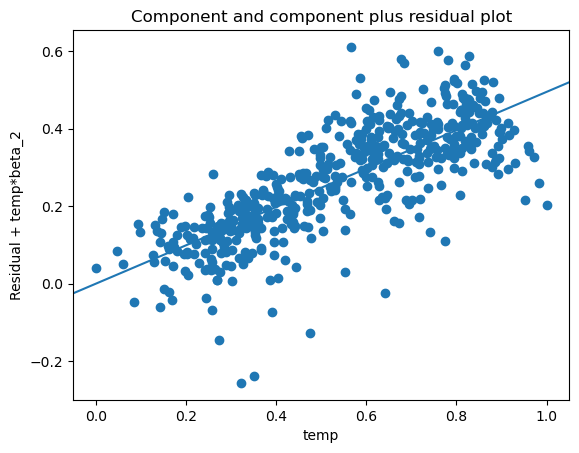

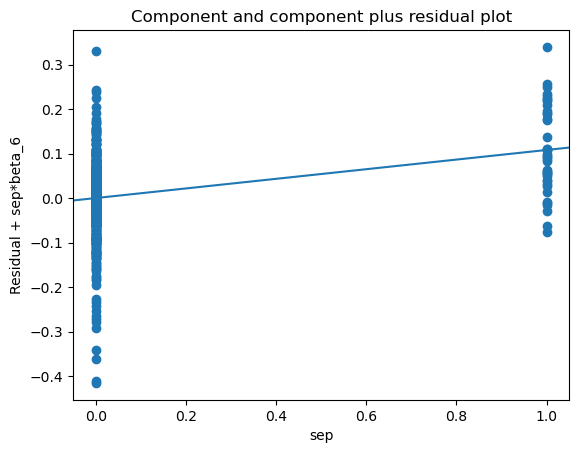

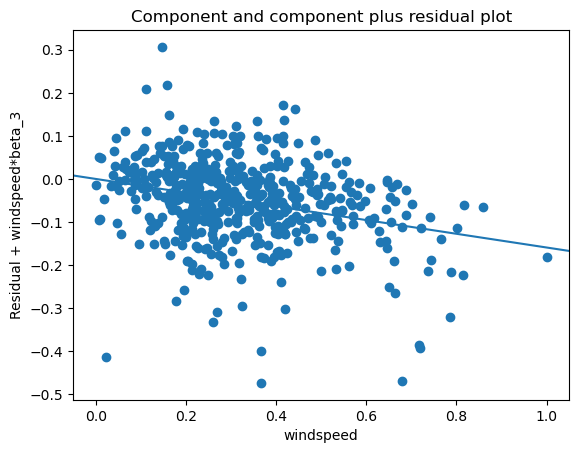

In [730]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_5, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'windspeed')
plt.show()

### Independence of residuals
Durbin-Watson value of final model lr_5 is 2.023, which signifies there is no autocorrelation.

# Step 7: Making Predictions Using the Final Model

In [734]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [736]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [738]:
y_test = df_test.pop('cnt')
X_test = df_test

In [754]:
col1 = X_train_new_4.columns
X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)

In [756]:
y_pred = lr_5.predict(X_test_lm_5)

In [758]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7921

test R2 score is 0.7921

### Model Evaluation

Text(0, 0.5, 'y_pred')

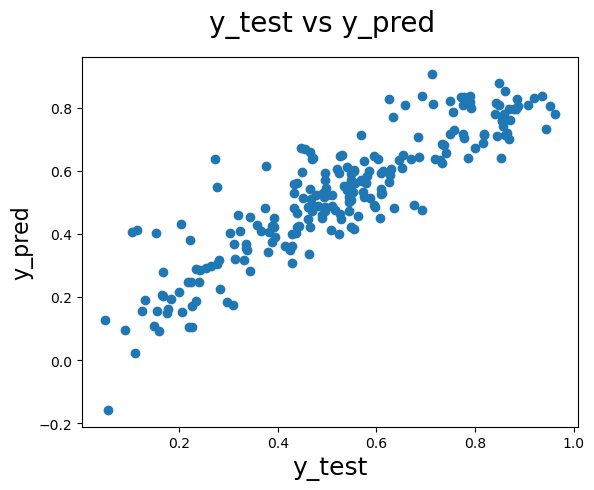

In [762]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [764]:
round(lr_5.params,4)

const             0.1584
year              0.2337
temp              0.4947
windspeed        -0.1593
aug               0.0508
jan              -0.0439
sep               0.1081
sun              -0.0452
Light_snowrain   -0.2839
Misty            -0.0802
summer            0.0946
winter            0.1258
dtype: float64

Model equestion

cnt= 0.1584+0.2337 x year+0.4947 x temp-0.1593 x windspeed+0.0508 x aug-0.0439 x jan+0.1081 x sep-0.0452 x sun-0.2839 x Light_snowrain-0.0802 x Misty+0.0946 x summer+0.1258 x winter

In [771]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7811


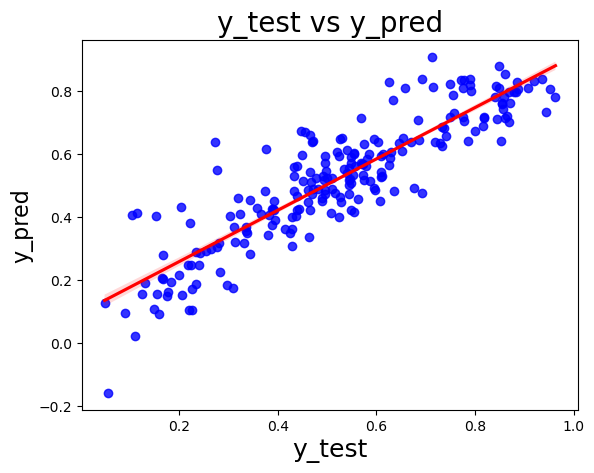

In [773]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.836
- Test dataset R^2           : 0.7921
- Train dataset Adjusted R^2 : 0.833    
- Test dataset Adjusted R^2  : 0.7811
  
Demand of bikes depend on year, temp, windspeed,aug, jan,sep,sun, Light_snowrain, Misty,summer, winter